In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount('/content/drive')

filepath = "/content/drive/MyDrive/Colab Notebooks/cbb.csv"
bb = pd.read_csv(filepath)

Mounted at /content/drive


In [4]:
unique_teams = bb['TEAM'].drop_duplicates().reset_index(drop=True)
print(unique_teams.to_string())

0              North Carolina
1                   Wisconsin
2                    Michigan
3                  Texas Tech
4                     Gonzaga
5                    Kentucky
6                        Duke
7                    Virginia
8                   Villanova
9                 Connecticut
10                 Louisville
11                 Notre Dame
12                Florida St.
13                     Purdue
14                     Kansas
15                 Kansas St.
16                     Xavier
17                    Arizona
18                     Oregon
19                    Florida
20               Michigan St.
21                     Dayton
22                   Ohio St.
23                  Marquette
24                   Syracuse
25                   Oklahoma
26             Loyola Chicago
27             South Carolina
28                     Auburn
29                Wichita St.
30                   Duquesne
31                    Fordham
32               George Mason
33        

In [5]:
print(bb.columns)

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR', 'LOCATION'],
      dtype='object')


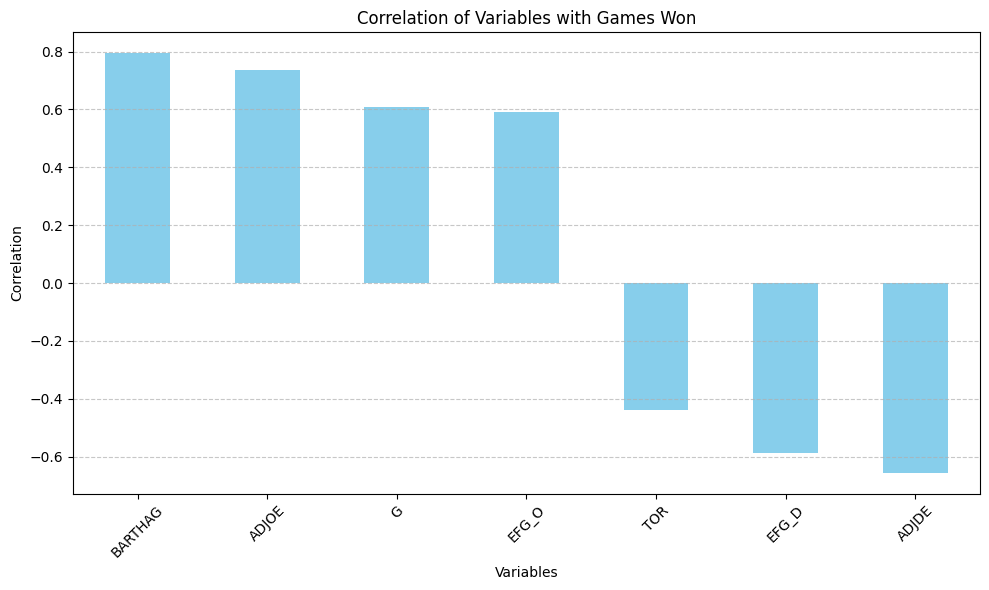

Correlation of different attributes with games won:
 W          1.000000
BARTHAG    0.794127
ADJOE      0.736713
G          0.608824
EFG_O      0.590957
TOR       -0.439382
EFG_D     -0.585786
ADJDE     -0.655700
Name: W, dtype: float64


In [6]:
numeric_columns = ['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR']
bb_numeric = bb[numeric_columns]
bb_numeric = bb_numeric.apply(pd.to_numeric, errors='coerce')
correlations = bb_numeric.corr()['W'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
correlations.drop('W').plot(kind='bar', color='skyblue')
plt.title('Correlation of Variables with Games Won')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Correlation of different attributes with games won:\n", correlations)


In [7]:
best_team = bb.loc[bb['W'].idxmax()]

print("Team that performs the best:")
print(best_team[['TEAM', 'W']])

Team that performs the best:
TEAM    Kentucky
W             38
Name: 49, dtype: object


In [8]:
team_min_games_won = bb.loc[bb['W'].idxmin()]

print("Team with the fewest games won:")
print(team_min_games_won[['TEAM', 'W']])

Team with the fewest games won:
TEAM    San Jose St.
W                  0
Name: 888, dtype: object


In [9]:
team_performance = bb.groupby('TEAM')['W'].mean().sort_values(ascending=False)

num_top_teams = 5
top_teams = team_performance.head(num_top_teams)

print(f"Top {num_top_teams} teams based on average games won:")
print(top_teams)

Top 5 teams based on average games won:
TEAM
Gonzaga      30.7
Kansas       28.5
Duke         27.7
Arizona      27.3
Villanova    27.3
Name: W, dtype: float64


In [10]:
kentucky_data = bb[bb['TEAM'] == 'Kentucky']


avg_wins_kentucky = kentucky_data['W'].mean()
print(f"\nAverage games won for Kentucky: {avg_wins_kentucky}")



Average games won for Kentucky: 26.0


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

filepath = "/content/drive/MyDrive/Colab Notebooks/cbb.csv"
df = pd.read_csv(filepath)

features = ['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR']
X = df[features]
y = df['W']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

def predict_game_outcome(team1, team2):
    team1_data = df[df['TEAM'] == team1][features].values[0]
    team2_data = df[df['TEAM'] == team2][features].values[0]

    team1_data = team1_data.reshape(1, -1)
    team2_data = team2_data.reshape(1, -1)

    prob_team1_wins = model.predict(team1_data)[0]
    prob_team2_wins = model.predict(team2_data)[0]

    total_prob = prob_team1_wins + prob_team2_wins
    win_prob_team1 = prob_team1_wins / total_prob
    win_prob_team2 = prob_team2_wins / total_prob

    team1_location = df[df['TEAM'] == team1]['LOCATION'].values[0]
    team2_location = df[df['TEAM'] == team2]['LOCATION'].values[0]

    if team1_location == 'H':
        win_prob_team1 += 0.05
        win_prob_team2 -= 0.05
    elif team1_location == 'A':
        win_prob_team1 -= 0.05
        win_prob_team2 += 0.05

    if team2_location == 'H':
        win_prob_team2 += 0.1
        win_prob_team1 -= 0.1
    elif team2_location == 'A':
        win_prob_team2 -= 0.1
        win_prob_team1 += 0.1

    win_prob_team1 = min(max(win_prob_team1, 0), 1)
    win_prob_team2 = min(max(win_prob_team2, 0), 1)

    return {
        'team1': {
            'name': team1,
            'win_probability': win_prob_team1,
            'stats_used': dict(zip(features, team1_data[0]))
        },
        'team2': {
            'name': team2,
            'win_probability': win_prob_team2,
            'stats_used': dict(zip(features, team2_data[0]))
        }
    }

team1 = input("Enter the name of the first team: ")
team2 = input("Enter the name of the second team: ")
prediction = predict_game_outcome(team1, team2)
print(f"Prediction for {team1} vs {team2}:")
print(f"Probability of {team1} winning: {prediction['team1']['win_probability']:.2f}")
print(f"Stats for {team1}: {prediction['team1']['stats_used']}")
print(f"Probability of {team2} winning: {prediction['team2']['win_probability']:.2f}")
print(f"Stats for {team2}: {prediction['team2']['stats_used']}")

if prediction['team1']['win_probability'] > prediction['team2']['win_probability']:
    print(f"{team1} is more likely to win")
    print(f"{team1} is playing at home")
elif prediction['team1']['win_probability'] < prediction['team2']['win_probability']:
    print(f"{team2} is more likely to win")
    print(f"{team2} is playing at home")

team1_location = df[df['TEAM'] == team1]['LOCATION'].values[0]
team2_location = df[df['TEAM'] == team2]['LOCATION'].values[0]

import warnings
warnings.filterwarnings('ignore', category=UserWarning, message='X does not have valid feature names, but RandomForestRegressor was fitted with feature names')


Enter the name of the first team: MICHIGAN
Enter the name of the second team: duke


IndexError: index 0 is out of bounds for axis 0 with size 0

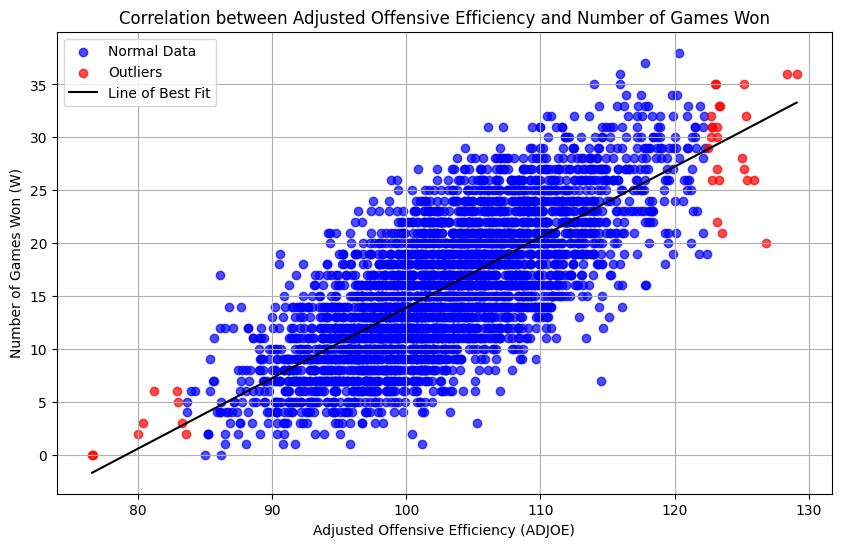

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = "/content/drive/MyDrive/Colab Notebooks/cbb.csv"
df = pd.read_csv(filepath)

Q1 = df['ADJOE'].quantile(0.25)
Q3 = df['ADJOE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[~((df['ADJOE'] >= lower_bound) & (df['ADJOE'] <= upper_bound))]
normal_data = df[((df['ADJOE'] >= lower_bound) & (df['ADJOE'] <= upper_bound))]

plt.figure(figsize=(10, 6))
plt.scatter(normal_data['ADJOE'], normal_data['W'], alpha=0.7, color='blue', label='Normal Data')
plt.scatter(outliers['ADJOE'], outliers['W'], alpha=0.7, color='red', label='Outliers')

coefficients = np.polyfit(df['ADJOE'], df['W'], 1)
poly = np.poly1d(coefficients)

curve_x = np.linspace(df['ADJOE'].min(), df['ADJOE'].max(), 100)
curve_y = poly(curve_x)

plt.plot(curve_x, curve_y, color='black', linestyle='-', label='Line of Best Fit')
plt.title('Correlation between Adjusted Offensive Efficiency and Number of Games Won')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Number of Games Won (W)')
plt.grid(True)
plt.legend()
plt.show()


In [13]:
import pandas as pd
import numpy as np

filepath = "/content/drive/MyDrive/Colab Notebooks/cbb.csv"
df = pd.read_csv(filepath)

Q1 = df['ADJOE'].quantile(0.25)
Q3 = df['ADJOE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
normal_data = df[((df['ADJOE'] >= lower_bound) & (df['ADJOE'] <= upper_bound))]

X = normal_data['ADJOE']
y = normal_data['W']
model = np.polyfit(X, y, 1)

slope_coefficient = model[0]
intercept = model[1]
print(f"Slope coefficient (𝛽1): {slope_coefficient}")
print(f"Intercept (𝛽0): {intercept}")

Slope coefficient (𝛽1): 0.6704861604076251
Intercept (𝛽0): -53.17177025109583


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv(filepath)

X = df[['ADJOE']]
y = df['W']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

squared_errors = (y_test - y_pred) ** 2

tse = squared_errors.sum()
print(f"Total Squared Error: {tse}")

Mean Squared Error: 20.40690158605382
Total Squared Error: 14386.865618167943


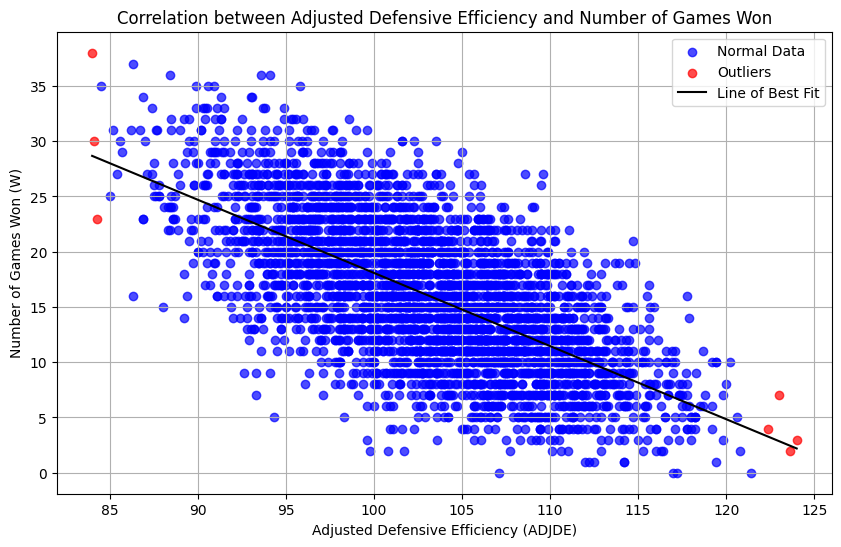

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = "/content/drive/MyDrive/Colab Notebooks/cbb.csv"
df = pd.read_csv(filepath)

Q1 = df['ADJDE'].quantile(0.25)
Q3 = df['ADJDE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[~((df['ADJDE'] >= lower_bound) & (df['ADJDE'] <= upper_bound))]
normal_data = df[((df['ADJDE'] >= lower_bound) & (df['ADJDE'] <= upper_bound))]

plt.figure(figsize=(10, 6))
plt.scatter(normal_data['ADJDE'], normal_data['W'], alpha=0.7, color='blue', label='Normal Data')
plt.scatter(outliers['ADJDE'], outliers['W'], alpha=0.7, color='red', label='Outliers')

coefficients = np.polyfit(df['ADJDE'], df['W'], 1)
poly = np.poly1d(coefficients)
curve_x = np.linspace(df['ADJDE'].min(), df['ADJDE'].max(), 100)
curve_y = poly(curve_x)
plt.plot(curve_x, curve_y, color='black', linestyle='-', label='Line of Best Fit')
plt.title('Correlation between Adjusted Defensive Efficiency and Number of Games Won')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Number of Games Won (W)')
plt.grid(True)
plt.legend()
plt.show()


In [16]:
import pandas as pd
import numpy as np

filepath = "/content/drive/MyDrive/Colab Notebooks/cbb.csv"
df = pd.read_csv(filepath)

Q1 = df['ADJDE'].quantile(0.25)
Q3 = df['ADJDE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
normal_data = df[((df['ADJDE'] >= lower_bound) & (df['ADJDE'] <= upper_bound))]

X = normal_data['ADJDE']
y = normal_data['W']
model = np.polyfit(X, y, 1)

slope_coefficient = model[0]
intercept = model[1]
print(f"Slope coefficient (𝛽1): {slope_coefficient}")
print(f"Intercept (𝛽0): {intercept}")

Slope coefficient (𝛽1): -0.6618453599501695
Intercept (𝛽0): 84.25914524979757


In [17]:
df = pd.read_csv(filepath)

X = df[['ADJDE']]
y = df['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

squared_errors = (y_test - y_pred) ** 2

tse = squared_errors.sum()
print(f"Total Squared Error: {tse}")

Mean Squared Error: 23.339117591280637
Total Squared Error: 16454.07790185285


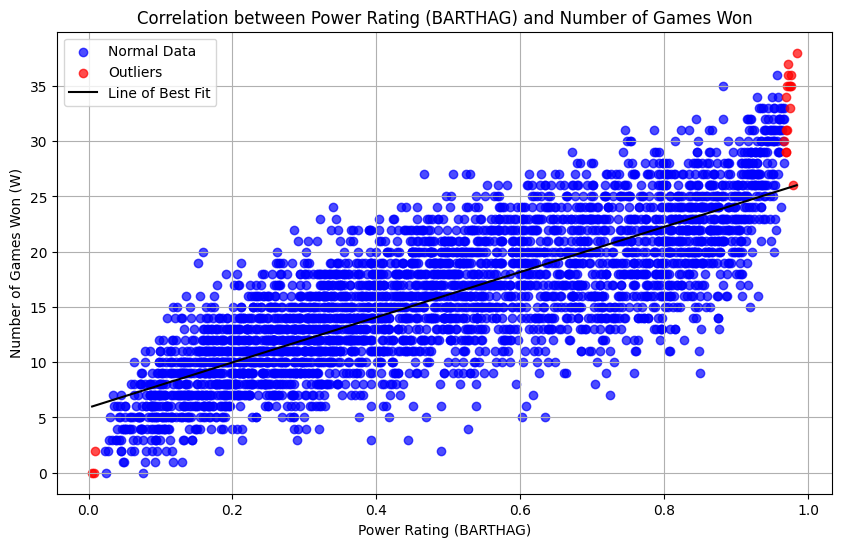

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.linear_model import LinearRegression

filepath = "/content/drive/MyDrive/Colab Notebooks/cbb.csv"
df = pd.read_csv(filepath)

Q1 = df['BARTHAG'].quantile(0.379)
Q3 = df['BARTHAG'].quantile(0.65)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[~((df['BARTHAG'] >= lower_bound) & (df['BARTHAG'] <= upper_bound))]
normal_data = df[((df['BARTHAG'] >= lower_bound) & (df['BARTHAG'] <= upper_bound))]

plt.figure(figsize=(10, 6))
plt.scatter(normal_data['BARTHAG'], normal_data['W'], alpha=0.7, color='blue', label='Normal Data')
plt.scatter(outliers['BARTHAG'], outliers['W'], alpha=0.7, color='red', label='Outliers')

coefficients = np.polyfit(df['BARTHAG'], df['W'], 1)
poly = np.poly1d(coefficients)
curve_x = np.linspace(df['BARTHAG'].min(), df['BARTHAG'].max(), 100)
curve_y = poly(curve_x)
plt.plot(curve_x, curve_y, color='black', linestyle='-', label='Line of Best Fit')
plt.title('Correlation between Power Rating (BARTHAG) and Number of Games Won')
plt.xlabel('Power Rating (BARTHAG)')
plt.ylabel('Number of Games Won (W)')
plt.grid(True)
plt.legend()
plt.show()


In [19]:
import pandas as pd
import numpy as np

filepath = "/content/drive/MyDrive/Colab Notebooks/cbb.csv"
df = pd.read_csv(filepath)

Q1 = df['BARTHAG'].quantile(0.25)
Q3 = df['BARTHAG'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
normal_data = df[((df['BARTHAG'] >= lower_bound) & (df['BARTHAG'] <= upper_bound))]

X = normal_data['BARTHAG']
y = normal_data['W']
model = np.polyfit(X, y, 1)

slope_coefficient = model[0]
intercept = model[1]
print(f"Slope coefficient (𝛽1): {slope_coefficient}")
print(f"Intercept (𝛽0): {intercept}")

Slope coefficient (𝛽1): 20.442372889099154
Intercept (𝛽0): 5.890730794704085


In [20]:
df = pd.read_csv(filepath)
X = df[['BARTHAG']]
y = df['W']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

squared_errors = (y_test - y_pred) ** 2
tse = squared_errors.sum()
print(f"Total Squared Error: {tse}")

Mean Squared Error: 15.574406585380146
Total Squared Error: 10979.956642693003


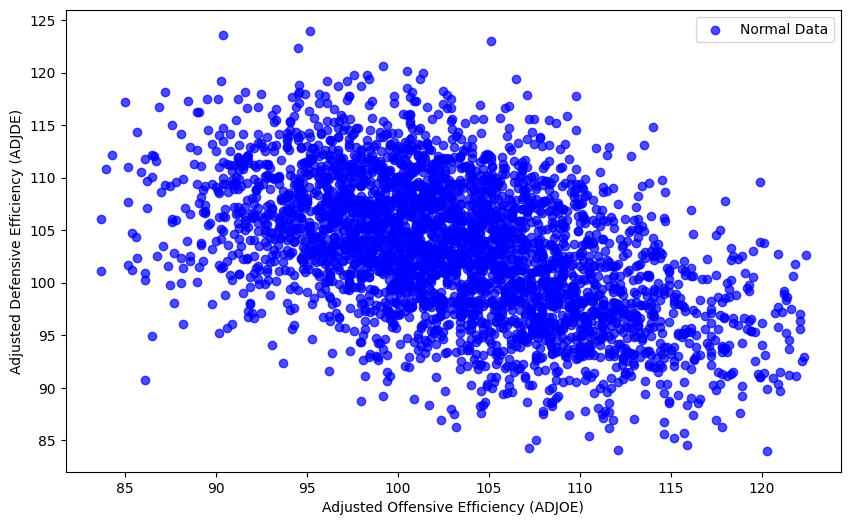

In [21]:
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cbb.csv")

Q1 = df['ADJOE'].quantile(0.25)
Q3 = df['ADJOE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
normal_data = df[((df['ADJOE'] >= lower_bound) & (df['ADJOE'] <= upper_bound))]
x = normal_data['ADJOE']
y = normal_data['ADJDE']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Normal Data')
plt.legend()
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Adjusted Defensive Efficiency (ADJDE)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


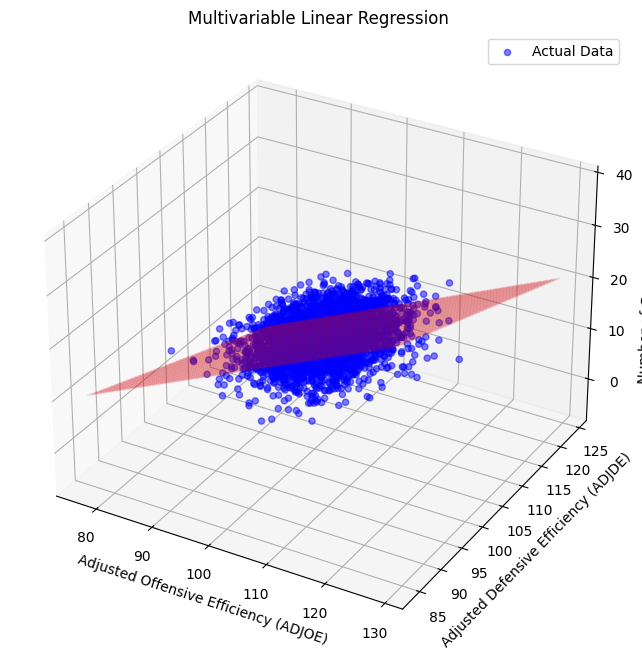

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

filepath = "/content/drive/MyDrive/Colab Notebooks/cbb.csv"
df = pd.read_csv(filepath)
X = df[['ADJOE', 'ADJDE']]
y = df['W']
model = LinearRegression()
model.fit(X, y)

adjoe_range = np.linspace(X['ADJOE'].min(), X['ADJOE'].max(), 50)
adjde_range = np.linspace(X['ADJDE'].min(), X['ADJDE'].max(), 50)
adjoe_grid, adjde_grid = np.meshgrid(adjoe_range, adjde_range)
w_grid = model.predict(np.c_[adjoe_grid.ravel(), adjde_grid.ravel()])
w_grid = w_grid.reshape(adjoe_grid.shape)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['ADJOE'], X['ADJDE'], y, color='blue', alpha=0.5, label='Actual Data')

surf = ax.plot_surface(adjoe_grid, adjde_grid, w_grid, alpha=0.1, edgecolor='red')
ax.set_xlabel('Adjusted Offensive Efficiency (ADJOE)')
ax.set_ylabel('Adjusted Defensive Efficiency (ADJDE)')
ax.set_zlabel('Number of Games Won (W)')
ax.set_title('Multivariable Linear Regression')
plt.legend()
plt.show()
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message='X does not have valid feature names, but RandomForestRegressor was fitted with feature names')


In [23]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

filepath = "/content/drive/MyDrive/Colab Notebooks/cbb.csv"
df = pd.read_csv(filepath)
X = df[['ADJOE', 'ADJDE']]
y = df['W']
model = LinearRegression()
model.fit(X, y)

adjoe_range = np.linspace(X['ADJOE'].min(), X['ADJOE'].max(), 50)
adjde_range = np.linspace(X['ADJDE'].min(), X['ADJDE'].max(), 50)
adjoe_grid, adjde_grid = np.meshgrid(adjoe_range, adjde_range)
w_grid = model.predict(np.c_[adjoe_grid.ravel(), adjde_grid.ravel()])
w_grid = w_grid.reshape(adjoe_grid.shape)

trace1 = go.Scatter3d(
    x=X['ADJOE'],
    y=X['ADJDE'],
    z=y,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.5
    ),
    name='Actual Data'
)

trace2 = go.Surface(
    x=adjoe_grid,
    y=adjde_grid,
    z=w_grid,
    colorscale='RdBu',
    opacity=0.6,
    showscale=False
)

layout = go.Layout(
    title='Multivariable Linear Regression',
    scene=dict(
        xaxis=dict(title='Adjusted Offensive Efficiency (ADJOE)'),
        yaxis=dict(title='Adjusted Defensive Efficiency (ADJDE)'),
        zaxis=dict(title='Number of Games Won (W)'),
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=0, y=0, z=-1.25)
        )
    ),
    width=1200,
    height=900,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=50
    )
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


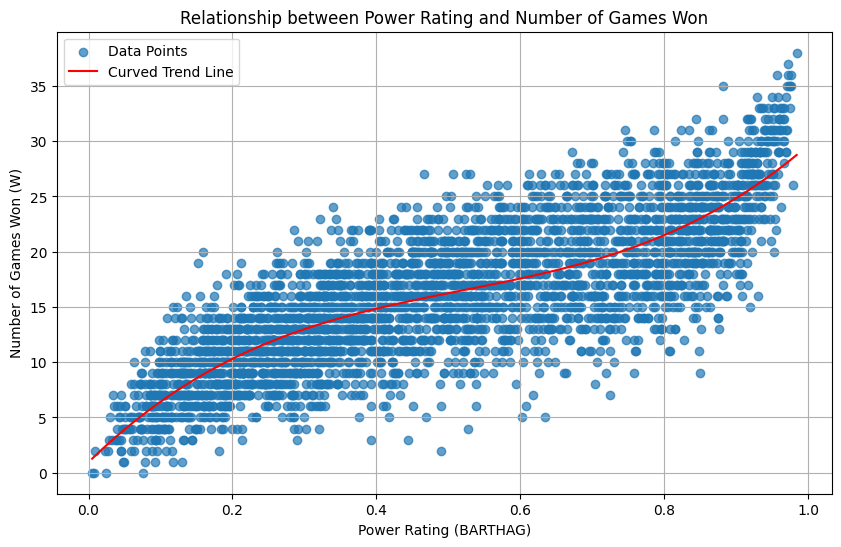

In [26]:
df = pd.read_csv(filepath)
coefficients = np.polyfit(df['BARTHAG'], df['W'], 3)
poly = np.poly1d(coefficients)

curve_x = np.linspace(df['BARTHAG'].min(), df['BARTHAG'].max(), 100)
curve_y = poly(curve_x)
plt.figure(figsize=(10, 6))

plt.scatter(df['BARTHAG'], df['W'], alpha=0.7, label='Data Points')
plt.plot(curve_x, curve_y, color='red', linestyle='-', label='Curved Trend Line')
plt.title('Relationship between Power Rating and Number of Games Won')
plt.xlabel('Power Rating (BARTHAG)')
plt.ylabel('Number of Games Won (W)')
plt.grid(True)
plt.legend()

plt.show()

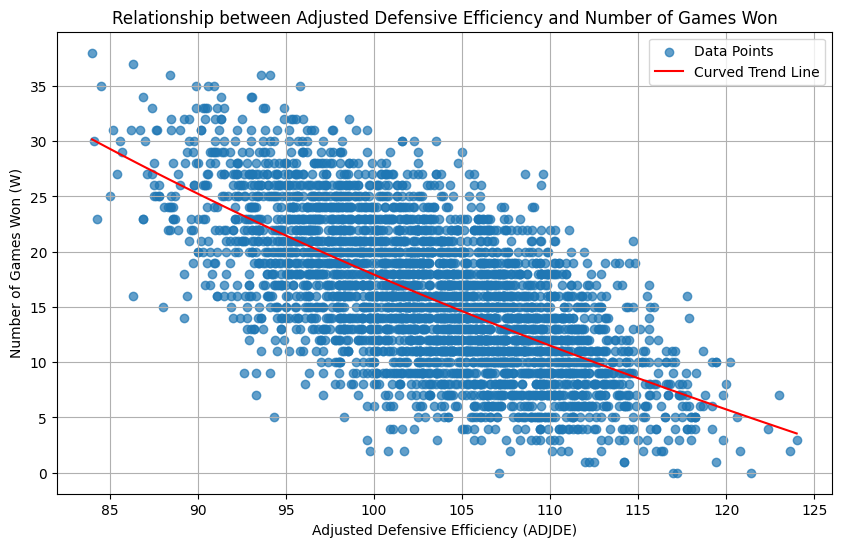

In [27]:
df = pd.read_csv(filepath)
coefficients = np.polyfit(df['ADJDE'], df['W'], 3)
poly = np.poly1d(coefficients)

curve_x = np.linspace(df['ADJDE'].min(), df['ADJDE'].max(), 100)

curve_y = poly(curve_x)

plt.figure(figsize=(10, 6))

plt.scatter(df['ADJDE'], df['W'], alpha=0.7, label='Data Points')

plt.plot(curve_x, curve_y, color='red', linestyle='-', label='Curved Trend Line')

plt.title('Relationship between Adjusted Defensive Efficiency and Number of Games Won')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Number of Games Won (W)')
plt.grid(True)
plt.legend()
plt.show()

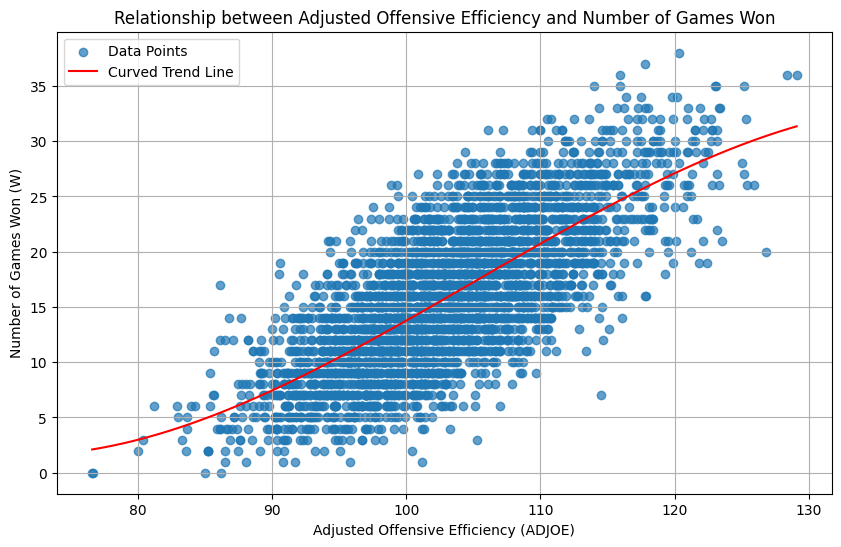

In [28]:
df = pd.read_csv(filepath)

coefficients = np.polyfit(df['ADJOE'], df['W'], 3)
poly = np.poly1d(coefficients)

curve_x = np.linspace(df['ADJOE'].min(), df['ADJOE'].max(), 100)

curve_y = poly(curve_x)

plt.figure(figsize=(10, 6))

plt.scatter(df['ADJOE'], df['W'], alpha=0.7, label='Data Points')

plt.plot(curve_x, curve_y, color='red', linestyle='-', label='Curved Trend Line')

plt.title('Relationship between Adjusted Offensive Efficiency and Number of Games Won')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Number of Games Won (W)')
plt.grid(True)
plt.legend()

plt.show()